# Tata Motors Stock Price Prediction

Recently, we have seen an increase of more than 10 per cent in the stock price of Tata Motors. This has resulted in more attention to Tata Group stocks from all over India. But again today, we are witnessing a fall in the prices of Tata Motors’ shares, which can be a negative signal for investors. In this article, I will walk you through the task of Tata Motors stock price prediction with machine learning using Python.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
%matplotlib inline 
import os


In [2]:
data = pd.read_csv("TATAMOTORS_BSE_01Oct20-01Oct21.csv.xls")
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-10-01  135.699997  136.500000  132.600006  133.500000  133.500000   
1  2020-10-05  137.000000  137.500000  132.050003  133.899994  133.899994   
2  2020-10-06  137.800003  145.699997  135.899994  144.850006  144.850006   
3  2020-10-07  144.100006  144.500000  139.800003  141.000000  141.000000   
4  2020-10-08  142.800003  143.350006  139.649994  140.899994  140.899994   

       Volume  
0   1674311.0  
1   2800303.0  
2  10190922.0  
3   4032654.0  
4   2491175.0  


Now let’s visualize an interactive visualisation of the stock prices to get a clear picture of the increase and decrease of the stock prices of Tata Motors

In [3]:
figure = go.Figure(data=[go.Candlestick(x=data['Date'],
                                       open=data['Open'], high=data['High'],
                                       low=data['Low'], close=data['Close'])])
figure.update_layout(title="Tata Motors Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

Now let’s have a look at the correlation between the features of this dataset:

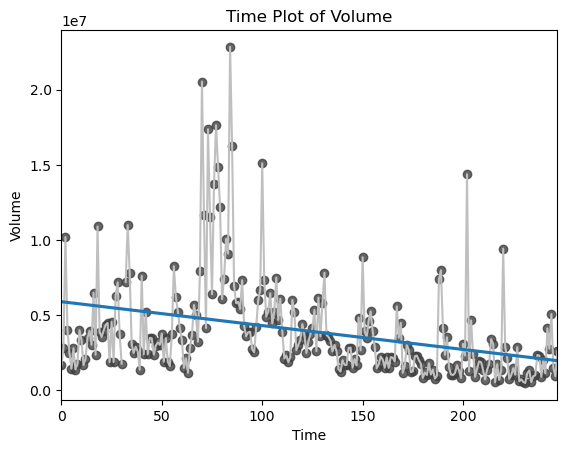

In [4]:
data['Time'] = np.arange(len(data.index))
fig, ax = plt.subplots()
ax.plot('Time', 'Volume', data=data, color='0.75')
ax = sns.regplot(x='Time', y='Volume', data=data, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Volume');

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example DataFrame
data = pd.DataFrame({
    'High': [100, 200, np.nan, 400, 500]  # Target variable with a NaN value
})

# Handle NaN values in the target variable 'High'
# Option 1: Remove rows with NaN values in the target variable
# data = data.dropna(subset=['High'])

# Option 2: Fill NaN values in the target variable with the mean of the column
data['High'].fillna(data['High'].mean(), inplace=True)

# Create a time dummy variable
time = np.arange(len(data.index))
data['time'] = time

# Define features and target
X = data.loc[:, ['time']]  # features
y = data.loc[:, 'High']  # target

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target values
y_pred = pd.Series(model.predict(X), index=X.index)

# Print the predicted values
print(y_pred)


0    100.0
1    200.0
2    300.0
3    400.0
4    500.0
dtype: float64


In [6]:
pip install learntools.time_series

ERROR: Could not find a version that satisfies the requirement learntools.time_series (from versions: none)
ERROR: No matching distribution found for learntools.time_series
Note: you may need to restart the kernel to use updated packages.


In [11]:
from pathlib import Path
from learntools.time_series.style import *  # plot style settings

ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of High');

ModuleNotFoundError: No module named 'learntools.time_series'

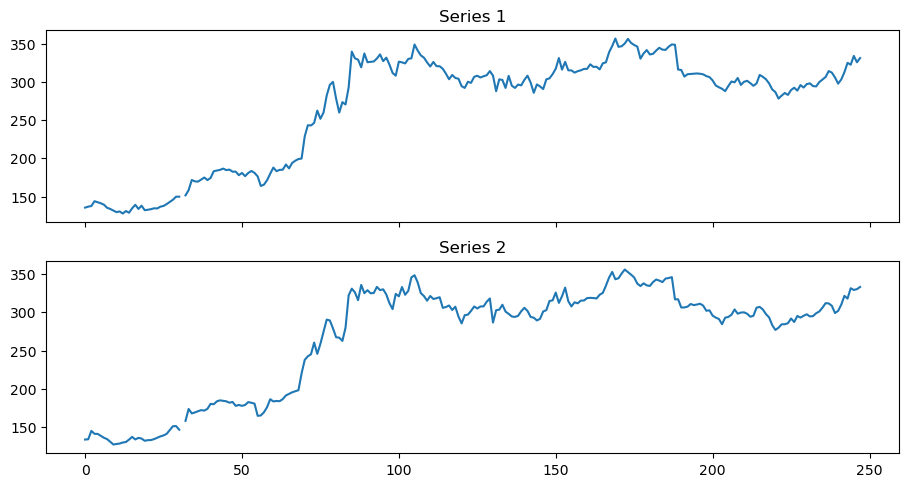

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(data['Open']) 

ax1.set_title('Series 1')
ax2.plot(data['Close'])
ax2.set_title('Series 2');

In [8]:
df = data

# YOUR CODE HERE: Create a lag feature from the target 'sales'
lag_1 = df['Open'].shift(1)

df['lag_1'] = lag_1  # add to dataframe

X = df.loc[:, ['lag_1']].dropna()  # features
y = df.loc[:, 'Open']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# YOUR CODE HERE: Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()

# YOUR CODE HERE: Create Store the fitted values as a time series with
model.fit(X, y) 
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

ValueError: Input y contains NaN.

NameError: name 'y_pred' is not defined

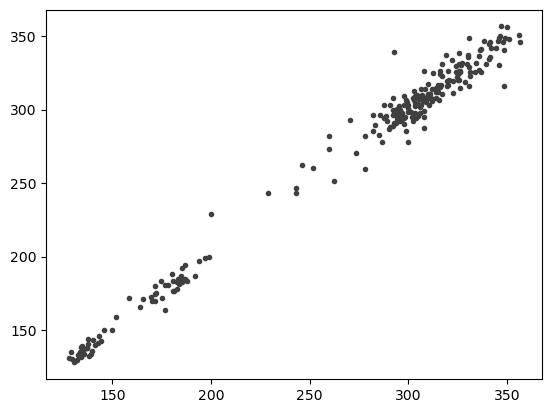

In [9]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='Open', xlabel='lag_1', title='Lag Plot of Open');